## Loading the dataset

In [1]:
import pandas as pd

# Load dataset
dataset_path = "../data/WA_Fn-UseC_-HR-Employee-Attrition.csv"  # Adjust path if needed
df = pd.read_csv(dataset_path)

# Display first few rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
missing_values = df.isnull().sum()
print("\n🔍 Missing Values:\n", missing_values[missing_values > 0])

# Check column data types
print("\n📊 Column Data Types:\n", df.dtypes)


Dataset contains 1470 rows and 35 columns.

🔍 Missing Values:
 Series([], dtype: int64)

📊 Column Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSa

In [3]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\n🔹 Categorical Columns:", categorical_cols.tolist())
print("\n🔢 Numerical Columns:", numerical_cols.tolist())

# Display unique values for categorical features
for col in categorical_cols:
    print(f"\n🔸 Unique values in {col}: {df[col].unique()}")


🔹 Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

🔢 Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

🔸 Unique values in Attrition: ['Yes' 'No']

🔸 Unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

🔸 Unique values in Department: ['Sales' 'Research & Development' 'Human Resources']

🔸 Unique values in EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resource

C:\Users\Iron-PC\AppData\Local\Temp\ipykernel_8956\3210577422.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="Set2")


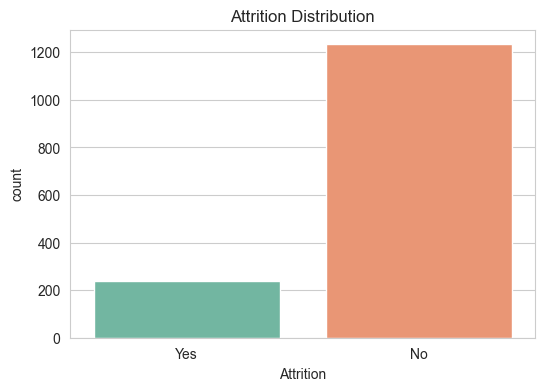

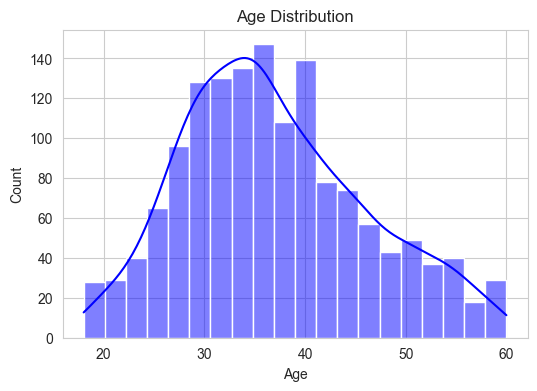

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_style("whitegrid")

# Countplot for Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x="Attrition", data=df, palette="Set2")
plt.title("Attrition Distribution")
plt.show()

# Histogram for Age
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

## Preprocessing

### Handling Missing Values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric missing values with median
df.dropna(inplace=True)  # Drop rows with missing values (use only if necessary)

### Encoding Categorical Variables

In [10]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later use

### Scaling Numerical Features

In [11]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [12]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.438422,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.438422,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.438422,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.438422,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.0,1.721670,...,0.266233,0.0,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,-0.438422,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,0.0,1.723332,...,-1.584178,0.0,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,-0.438422,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,0.0,1.726655,...,-0.658973,0.0,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.438422,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,0.0,1.728317,...,1.191438,0.0,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895
